In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import warnings
warnings.filterwarnings("ignore") 
%matplotlib inline

In [50]:
# load haberman.csv into a pandas dataframe
haberman = pd.read_csv('downloads/haberman.csv')

if we want to changes the names of the features
cancer_df = pd.read_csv('../input/haberman.csv', header=None, names=['age', 'year_of_treatment', 'positive_lymph_nodes', 'survival_status_after_5_years'])

In [51]:
haberman.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [52]:
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [53]:
haberman['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

In [54]:
list(haberman['status'].unique())

[1, 2]

In [55]:
haberman['status'].unique()

array([1, 2], dtype=int64)

In [57]:
# converting numercial values of status features to categorical values
haberman['status']=haberman['status'].map({1:'yes',2:'no'})
haberman['status']=haberman['status'].astype('category')

In [59]:
haberman.head()

,age,year,nodes,status
0,30,64,1,yes
1,30,62,3,yes
2,30,65,0,yes
3,31,59,2,yes
4,31,65,4,yes


In [60]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null category
dtypes: category(1), int64(3)
memory usage: 7.7 KB


In [61]:
haberman.describe()

,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


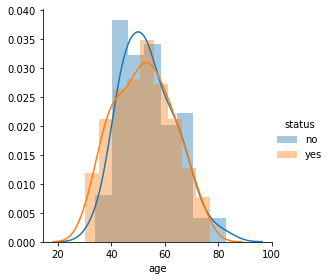

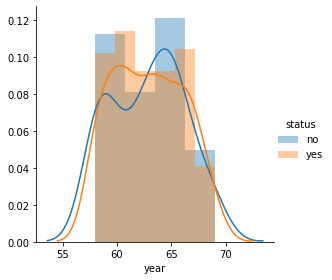

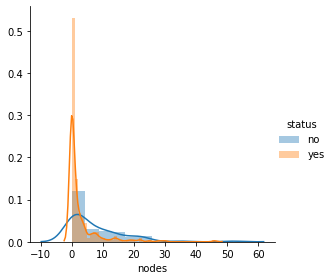

In [86]:
for index,feature in enumerate(list(haberman.columns[:-1])):
    sns.FacetGrid(haberman,hue='status',size=4)\
    .map(sns.distplot,feature)\
    .add_legend()
    plt.show()

In [95]:
haberman_one = haberman.loc[haberman['status']=='yes']
haberman_two = haberman.loc[haberman['status']=='no']

In [94]:
haberman.head(3)

,age,year,nodes,status
0,30,64,1,yes
1,30,62,3,yes
2,30,65,0,yes


*********age*************
counts [0.01134752 0.02269504 0.02647754 0.01985816 0.03498818 0.03498818
 0.01985816 0.02364066 0.01323877 0.00567376]
bin_edges [30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
pdf:[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
cdf:[0.05333333 0.16       0.28444444 0.37777778 0.54222222 0.70666667
 0.8        0.91111111 0.97333333 1.        ]
*********year*************
counts [0.16969697 0.0969697  0.09292929 0.06464646 0.08888889 0.09292929
 0.06060606 0.08888889 0.08484848 0.06868687]
bin_edges [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
pdf:[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
cdf:[0.18666667 0.29333333 0.39555556 0.46666667 0.56444444 0.66666667
 0.73333333 0.83111111 0.92444444 1.        ]
*********nodes*************
counts [0.18164251 0.0173913  0.00483092 0.0057971  0.00386473 0.00096618
 0.

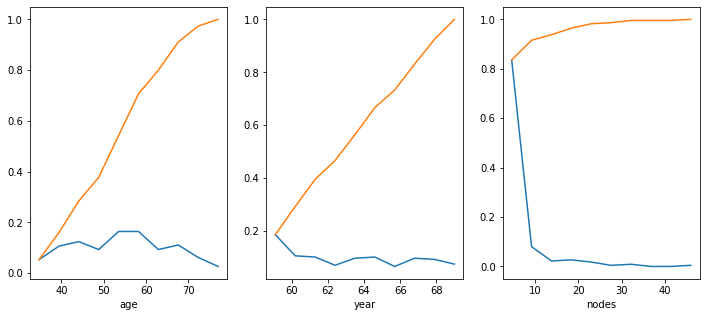

In [97]:
plt.figure(figsize=(12,5))
for index,feature in enumerate(list(haberman_one.columns[:-1])):
    plt.subplot(1, 3, index+1)
    print('*********'+feature+'*************')
    counts,bin_edges = np.histogram(haberman_one[feature],bins=10,density=True)
    print('counts',counts)
    print('bin_edges',bin_edges)
    pdf = counts / sum(counts)
    print('pdf:{}'.format(pdf))
    cdf = np.cumsum(pdf)
    print('cdf:{}'.format(cdf))
    plt.plot(bin_edges[1:],pdf)
    plt.plot(bin_edges[1:],cdf)
    plt.xlabel(feature)

*********age*************
counts [0.00755858 0.02519526 0.04031242 0.04031242 0.02771479 0.02519526
 0.02015621 0.01007811 0.00503905 0.00251953]
bin_edges [34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]
pdf:[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
cdf:[0.03703704 0.16049383 0.35802469 0.55555556 0.69135802 0.81481481
 0.91358025 0.96296296 0.98765432 1.        ]
*********year*************
counts [0.23569024 0.04489338 0.03367003 0.07856341 0.08978676 0.08978676
 0.14590348 0.06734007 0.04489338 0.07856341]
bin_edges [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
pdf:[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
cdf:[0.25925926 0.30864198 0.34567901 0.43209877 0.5308642  0.62962963
 0.79012346 0.86419753 0.91358025 1.        ]
*********nodes*************
counts [0.10921178 0.02849003 0.02611586 0.00949668 0.01424501 0.
 0.00237417

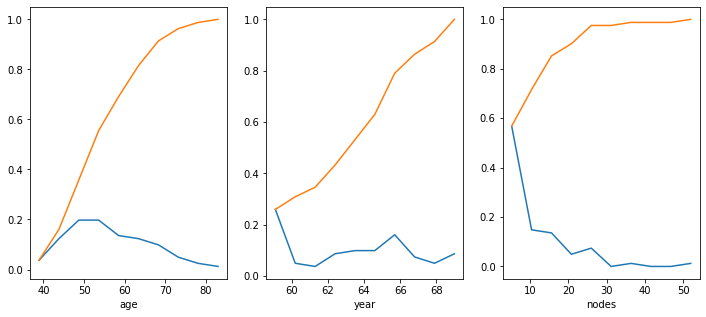

In [98]:
plt.figure(figsize=(12,5))
for index,feature in enumerate(list(haberman_two.columns[:-1])):
    plt.subplot(1, 3, index+1)
    print('*********'+feature+'*************')
    counts,bin_edges = np.histogram(haberman_two[feature],bins=10,density=True)
    print('counts',counts)
    print('bin_edges',bin_edges)
    pdf = counts / sum(counts)
    print('pdf:{}'.format(pdf))
    cdf = np.cumsum(pdf)
    print('cdf:{}'.format(cdf))
    plt.plot(bin_edges[1:],pdf)
    plt.plot(bin_edges[1:],cdf)
    plt.xlabel(feature)

*********age*************
counts [0.01134752 0.02269504 0.02647754 0.01985816 0.03498818 0.03498818
 0.01985816 0.02364066 0.01323877 0.00567376]
bin_edges [30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
pdf:[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
cdf:[0.05333333 0.16       0.28444444 0.37777778 0.54222222 0.70666667
 0.8        0.91111111 0.97333333 1.        ]
*********year*************
counts [0.16969697 0.0969697  0.09292929 0.06464646 0.08888889 0.09292929
 0.06060606 0.08888889 0.08484848 0.06868687]
bin_edges [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
pdf:[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
cdf:[0.18666667 0.29333333 0.39555556 0.46666667 0.56444444 0.66666667
 0.73333333 0.83111111 0.92444444 1.        ]
*********nodes*************
counts [0.18164251 0.0173913  0.00483092 0.0057971  0.00386473 0.00096618
 0.

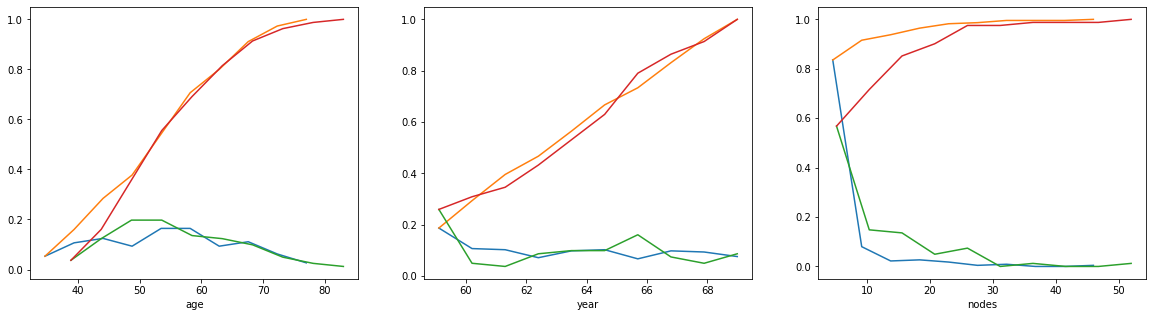

In [102]:
plt.figure(figsize=(20,5))
for index,feature in enumerate(list(haberman_one.columns[:-1])):
    plt.subplot(1, 3, index+1)
    print('*********'+feature+'*************')
    counts,bin_edges = np.histogram(haberman_one[feature],bins=10,density=True)
    print('counts',counts)
    print('bin_edges',bin_edges)
    pdf = counts / sum(counts)
    print('pdf:{}'.format(pdf))
    cdf = np.cumsum(pdf)
    print('cdf:{}'.format(cdf))
    plt.plot(bin_edges[1:],pdf)
    plt.plot(bin_edges[1:],cdf)
for index,feature in enumerate(list(haberman_two.columns[:-1])):   
    plt.subplot(1, 3, index+1)
    print('*********'+feature+'*************')
    counts,bin_edges = np.histogram(haberman_two[feature],bins=10,density=True)
    print('counts',counts)
    print('bin_edges',bin_edges)
    pdf = counts / sum(counts)
    print('pdf:{}'.format(pdf))
    cdf = np.cumsum(pdf)
    print('cdf:{}'.format(cdf))
    plt.plot(bin_edges[1:],pdf)
    plt.plot(bin_edges[1:],cdf)
    plt.xlabel(feature)